In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

import operator
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("all_tickets.csv")

In [3]:
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [4]:
df.shape

(48549, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ticket_type,48549.0,0.713115,0.452312,0.0,0.0,1.0,1.0,1.0
category,48549.0,4.491153,1.103556,0.0,4.0,4.0,5.0,12.0
sub_category1,48549.0,11.614390,13.752707,0.0,2.0,3.0,21.0,58.0
sub_category2,48549.0,32.004634,33.602122,0.0,7.0,21.0,53.0,114.0
business_service,48549.0,49.482605,22.806100,0.0,32.0,49.0,67.0,102.0
urgency,48549.0,2.506066,0.855646,0.0,2.0,3.0,3.0,3.0
impact,48549.0,3.677460,0.591513,0.0,3.0,4.0,4.0,4.0


In [6]:
df.columns

Index(['title', 'body', 'ticket_type', 'category', 'sub_category1',
       'sub_category2', 'business_service', 'urgency', 'impact'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [8]:
df.isnull().sum()

title               712
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
    if dict[i] < 200 :
       print(i, '\t\t', df[i].unique())

ticket_type 		 [1 0]
category 		 [ 4  6  5  7 11  1  8 12  3  9  0 10  2]
sub_category1 		 [ 2 22 13  3  1 15 39 36 33 17 30 50 16 56 55 11 43  6 58 29 26 42 37  8
 24 45 25  0 52 28 31 46 38 20  4 48 18  5 44 21 51  9 12 35 32 10 14 41
 54 27 53 49 40 57 23 19 34  7 47]
sub_category2 		 [ 21   7  76  87  60  94  88  86 105  51   0   3  91 107 108  61  95  73
  12   6  16   9  70 102  33  26 104  68  44  93  27 100  46  92  75   8
  10  19  85  36  39  31 114  79   1  41  11  23  74  65 106 111  77  29
  40  53  89  63  71  98  82  62  78  50 110  22 112 101   4  55  30  90
  83  54  66  17  57  32  59  20   2  14  80  97  13  24  43 109  84  35
  69  42  96 113  37  28  48  67  81   5  34  18  58  99  25  45  72  49
  38  52  64 103  15  47  56]
business_service 		 [ 71  26  32   4  89  95  66  67  74  40  36  10  52  73  70  38  43  46
  19  92  51  49  63   2  87  96  48  29  27  41  65   7  68 100  24  88
  56   6  58  21   3  59  72  62  25  45  57  99  53   5  20  23  64  93
  42

In [11]:
def split_categories_numericals(dframe):
    cols = list(dframe.columns)
    num_cols = list(dframe._get_numeric_data().columns)
    cate_cols = list(set(cols) - set(num_cols))
    return cate_cols, num_cols

In [12]:
cate_cols, num_cols = split_categories_numericals(dframe=df)
print('Charater Columns (Objects) :- ',cate_cols) 
print('Numerical Columns :- ',num_cols) 

Charater Columns (Objects) :-  ['body', 'title']
Numerical Columns :-  ['ticket_type', 'category', 'sub_category1', 'sub_category2', 'business_service', 'urgency', 'impact']


array([[<AxesSubplot:title={'center':'ticket_type'}>,
        <AxesSubplot:title={'center':'category'}>,
        <AxesSubplot:title={'center':'sub_category1'}>],
       [<AxesSubplot:title={'center':'sub_category2'}>,
        <AxesSubplot:title={'center':'business_service'}>,
        <AxesSubplot:title={'center':'urgency'}>],
       [<AxesSubplot:title={'center':'impact'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

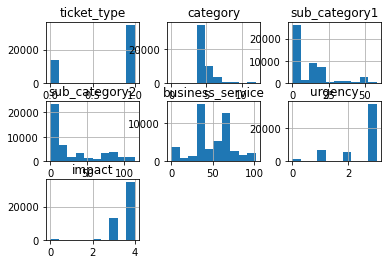

In [13]:
numeric_type1=['ticket_type','category','sub_category1','sub_category2' , 'business_service' , 'urgency' , 'impact']
df[numeric_type1].hist()

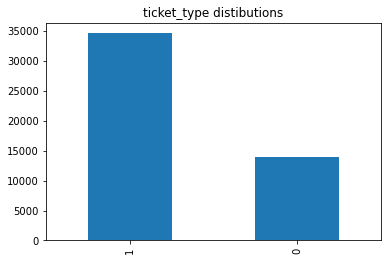

In [14]:
df['ticket_type'].value_counts().plot(kind='bar')
plt.title('ticket_type distibutions')
plt.show()

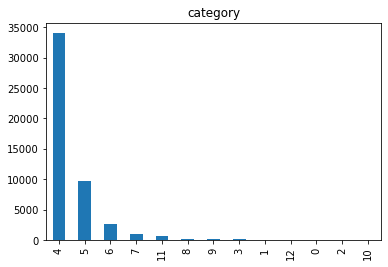

In [15]:
df['category'].value_counts().plot(kind='bar')
plt.title('category')
plt.show()

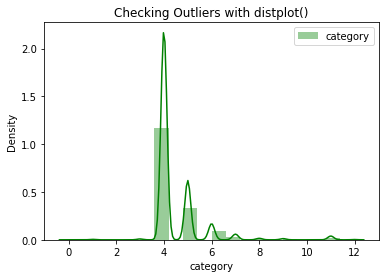

In [16]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.category, label='category', kde=True, bins=20, color='green')
plt.legend()

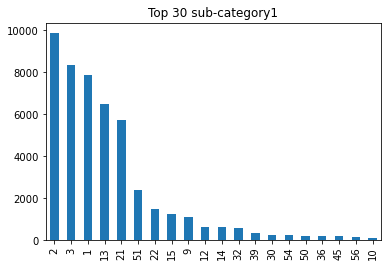

In [17]:
df['sub_category1'].value_counts()[:20].plot(kind='bar')
plt.title('Top 30 sub-category1')
plt.show()

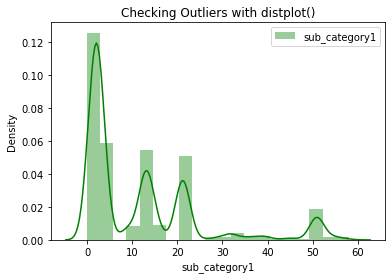

In [18]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.sub_category1, label='sub_category1', kde=True, bins=20, color='green')
plt.legend()

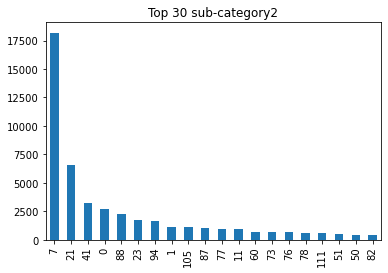

In [19]:
df['sub_category2'].value_counts()[:20].plot(kind='bar')
plt.title('Top 30 sub-category2')
plt.show()

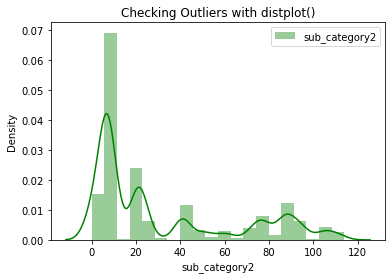

In [20]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.sub_category2, label='sub_category2', kde=True, bins=20, color='green')
plt.legend()

<Figure size 864x864 with 0 Axes>

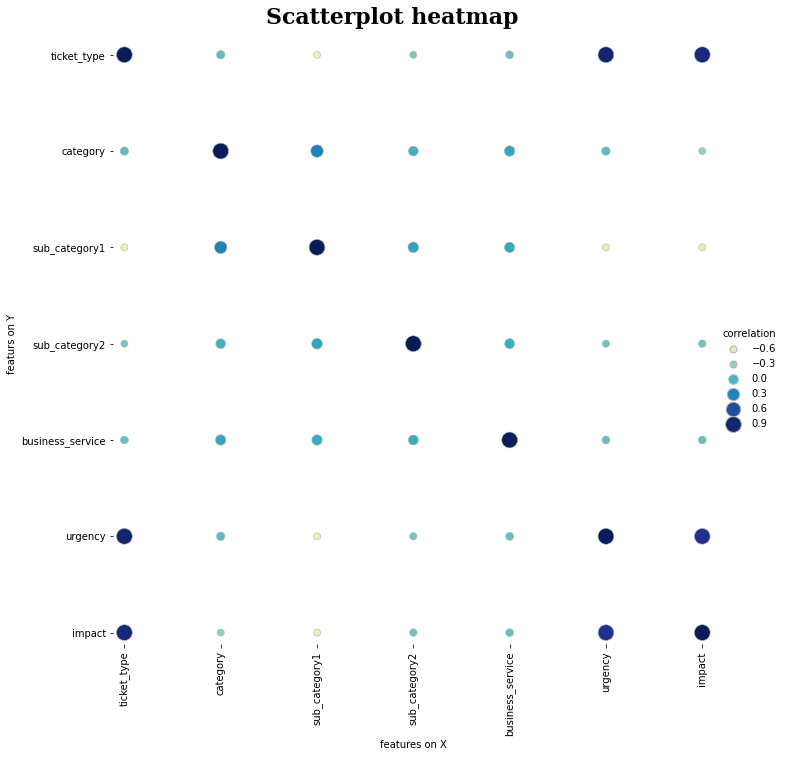

In [21]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

[]

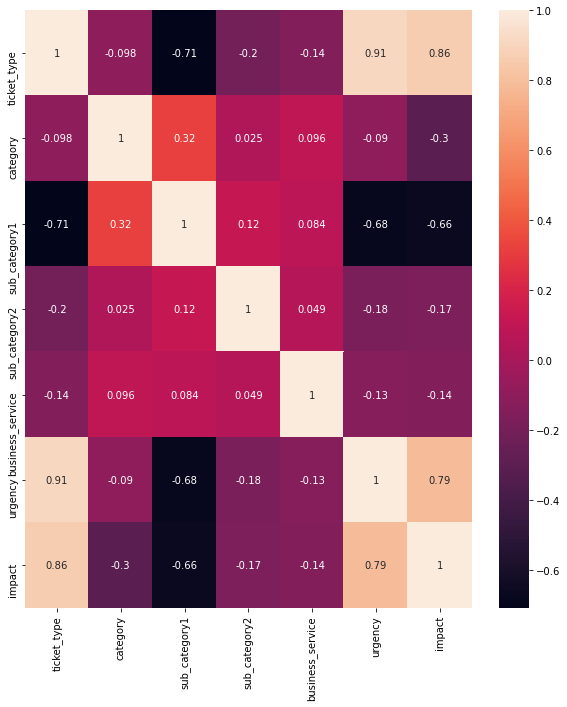

In [22]:
plot.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

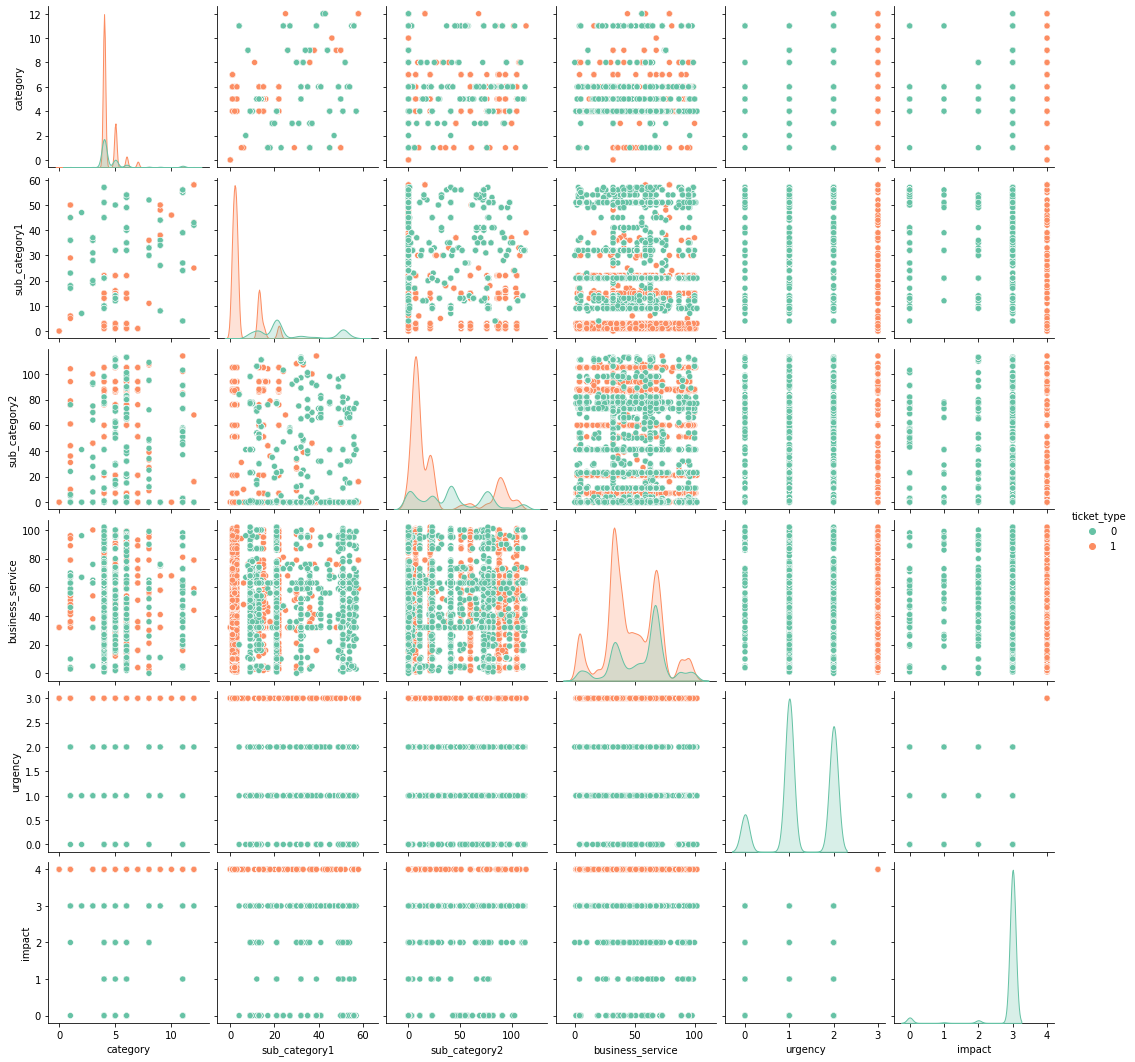

In [23]:
sns.pairplot(df,hue="ticket_type", palette="Set2")
plt.show()

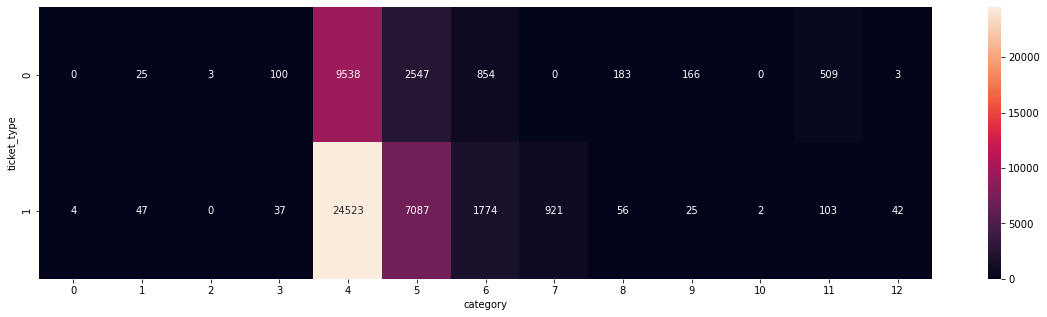

In [24]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.heatmap(pd.crosstab(df['ticket_type'],df['category']), annot=True, fmt='.0f')
plt.show()

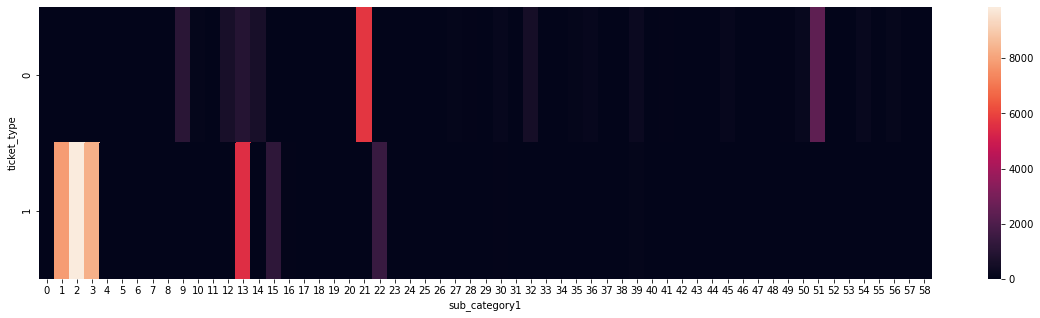

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.heatmap(pd.crosstab(df['ticket_type'],df['sub_category1']))
plt.show()

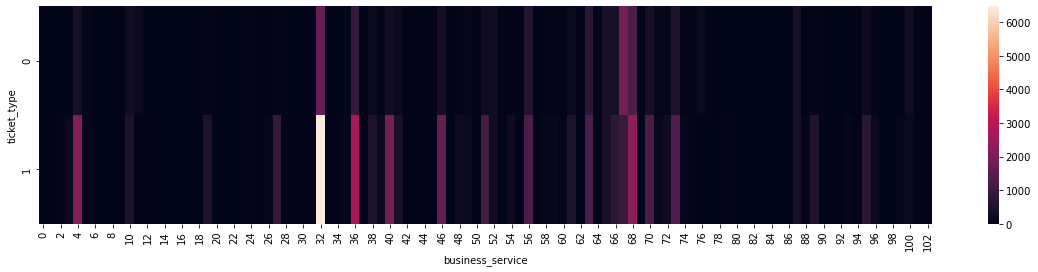

In [26]:
fig, ax = plt.subplots(figsize=(20,4))
ax = sns.heatmap(pd.crosstab(df['ticket_type'],df['business_service']))
plt.show()

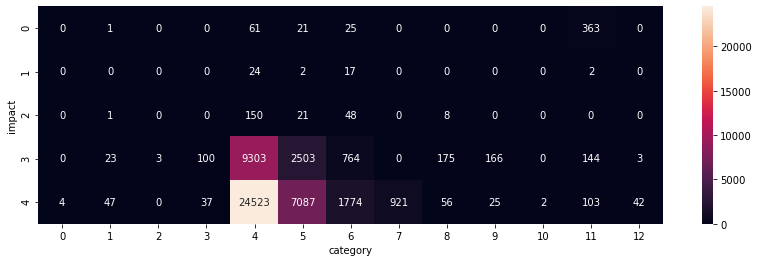

In [27]:
fig, ax = plt.subplots(figsize=(14,4)) 
ax = sns.heatmap(pd.crosstab(df['impact'],df['category']), annot=True, fmt='.0f')
plt.show()

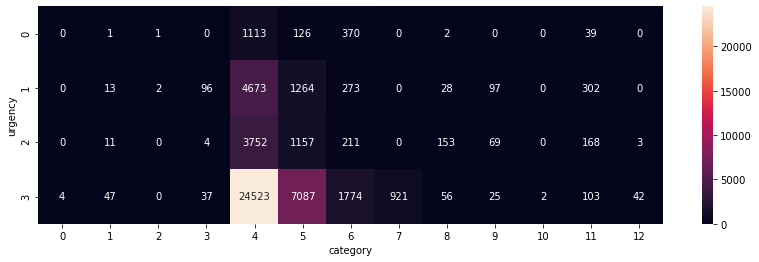

In [28]:
fig, ax = plt.subplots(figsize=(14,4)) 
ax = sns.heatmap(pd.crosstab(df['urgency'],df['category']), annot=True, fmt='.0f')
plt.show()

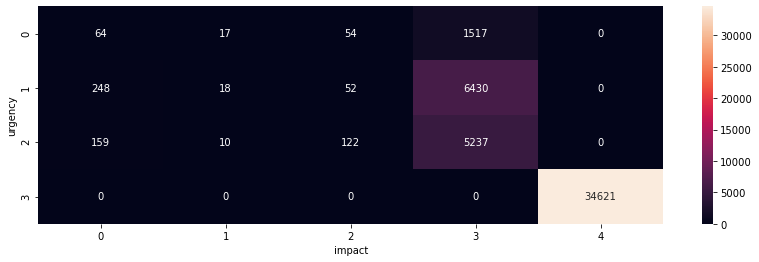

In [29]:
fig, ax = plt.subplots(figsize=(14,4)) 
ax = sns.heatmap(pd.crosstab(df['urgency'],df['impact']), annot=True, fmt='.0f')
plt.show()

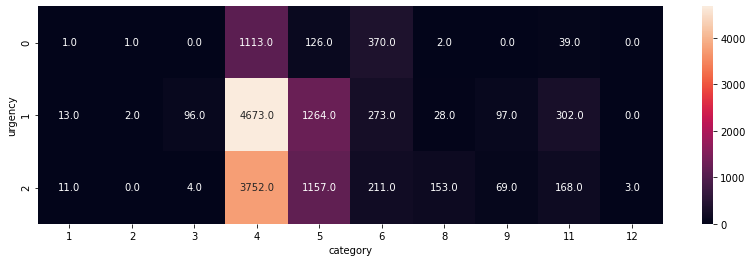

In [30]:
fig, ax = plt.subplots(figsize=(14,4)) 
ax = sns.heatmap(pd.crosstab(df[df['ticket_type']==0]['urgency'],df[df['ticket_type']==0]['category']), annot=True, fmt='.1f')
plt.show()

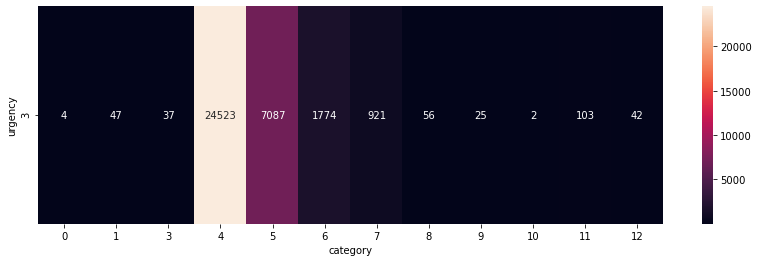

In [31]:
fig, ax = plt.subplots(figsize=(14,4)) 
ax = sns.heatmap(pd.crosstab(df[df['ticket_type']==1]['urgency'],df[df['ticket_type']==1]['category']), annot=True, fmt='.0f')
plt.show()

In [32]:
df_copy = df.copy()
df_copy.fillna('', inplace=True)
df_copy.head(2)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4


In [33]:
df_copy['info'] = df_copy['title'] + ' ' + df_copy['body']
df_copy.head(2)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4,hi since recruiter lead permission approve re...
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4,connection with icon icon dear please setup ic...


In [34]:
text = ' '.join(df_copy['info'])

In [35]:
freq_dict = {}
for val in text.split():
  freq_dict[val.strip()] = freq_dict.get(val.strip(), 0) + 1

freq_dict = sorted(freq_dict.items(), key=operator.itemgetter(1), reverse=True)
freq_dict[:10]

[('please', 70918),
 ('pm', 29353),
 ('hi', 28906),
 ('regards', 27525),
 ('thank', 25261),
 ('for', 24558),
 ('hello', 23275),
 ('you', 21994),
 ('re', 21300),
 ('thanks', 20142)]

In [36]:
info_char_count_0 = df_copy[df_copy['ticket_type']==0]['info'].apply(lambda x: len(x))
info_char_count_1 = df_copy[df_copy['ticket_type']==1]['info'].apply(lambda x: len(x))
info_word_count_0 = df_copy[df_copy['ticket_type']==0]['info'].apply(lambda x: len(x.split()))
info_word_count_1 = df_copy[df_copy['ticket_type']==1]['info'].apply(lambda x: len(x.split()))

In [37]:
print('Statistics for characters in ticket 0 :\n',info_char_count_0.describe())
print('\n\nStatistics for characters in ticket 1 :\n',info_char_count_1.describe())

Statistics for characters in ticket 0 :
 count    13928.000000
mean       360.162909
std        433.549130
min          6.000000
25%        150.000000
50%        226.500000
75%        377.000000
max       6880.000000
Name: info, dtype: float64


Statistics for characters in ticket 1 :
 count    34621.000000
mean       262.641923
std        363.168658
min          7.000000
25%         99.000000
50%        153.000000
75%        266.000000
max       7015.000000
Name: info, dtype: float64


In [38]:
print('Statistics for words in ticket 0 :\n',info_word_count_0.describe())
print('\n\nStatistics for words in ticket 1 :\n',info_char_count_0.describe())

Statistics for words in ticket 0 :
 count    13928.000000
mean        56.131246
std         66.187610
min          2.000000
25%         24.000000
50%         36.000000
75%         59.000000
max        981.000000
Name: info, dtype: float64


Statistics for words in ticket 1 :
 count    13928.000000
mean       360.162909
std        433.549130
min          6.000000
25%        150.000000
50%        226.500000
75%        377.000000
max       6880.000000
Name: info, dtype: float64


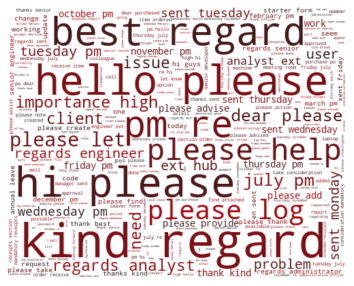

In [39]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['body'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')


wordcloud = WordCloud(background_color = 'white', width = 500,  height = 400,colormap=cmap, max_words = 250).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

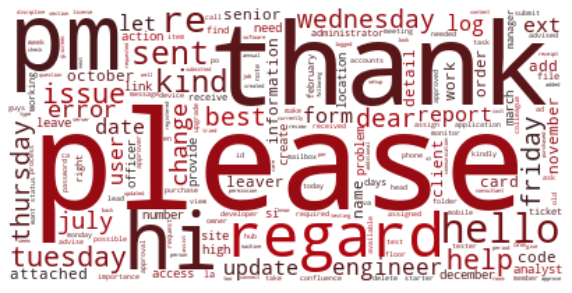

In [40]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
word_cloud = WordCloud(collocations = False,stopwords = set(STOPWORDS), background_color = 'white',colormap=cmap, max_words = 250).generate(text)
# Display the generated Word Cloud
plt.figure( figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()